In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def readImg(path):
    im = cv2.imread(path)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    return im

In [3]:
def showImg(img,t):
    plt.figure(figsize = (t,t))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [4]:
def sumCh(img):
    SR = np.sum(img[:,:,0])
    SG = np.sum(img[:,:,1])
    SB = np.sum(img[:,:,2])
    return SR,SG,SB

In [5]:
def constraint(img):
    SR, SG, SB = sumCh(img)
    print(sumCh(img))
    k1 = min(SR/SG, SG/SR)
    k2 = min(SR/SB, SB/SR)
    k3 = min(SG/SB, SB/SG)
    k = min(max(k1,k2,k3,0.8),0.9)
    print(k)
    return k

In [6]:
def updImg(img,k):
    imgUp = img.copy()
    imgUp[:,:,0] = img[:,:,0] * k
    imgUp[:,:,1] = img[:,:,1] * k
    imgUp[:,:,2] = img[:,:,2] * k
    return imgUp

In [7]:
def getAvgCh(img):
    SR, SG, SB = sumCh(img)
    y,x,_ = img.shape
    Ravg = SR/(y*x)
    Gavg = SG/(y*x)
    Bavg = SB/(y*x)
    print(Ravg,Gavg,Bavg, sep='\t')
    return Ravg,Gavg,Bavg

In [8]:
def shiftHist(imgUp):
    Ravg, Gavg, Bavg = getAvgCh(imgUp)
    print(getAvgCh(imgUp))
    diff1 = Ravg - Gavg
    diff2 = Bavg - Gavg
    print(diff1,diff2, sep='\t')
    img2 = imgUp.copy()
    img2[:,:,0] = img2[:,:,0] - diff1
    img2[:,:,2] = img2[:,:,2] - diff2
    return img2

In [9]:
def compensation(nImg):
    Ravg, Gavg, Bavg = getAvgCh(nImg)
    print(getAvgCh(nImg))
    diff1 = Ravg - Gavg
    diff2 = Bavg - Gavg
    print(diff1,diff2, sep='\t')
    dr = nImg[:,:,0].max() - (Ravg - Gavg)
    db = nImg[:,:,2].max() - (Bavg - Gavg)
    print(nImg[:,:,0].max(),dr,nImg[:,:,2].max(),db)
    y,x,_ = nImg.shape
    img3 = nImg.copy()
    for i in range(0,y-1):
        for j in range(0,x-1):
            if (img3[i,j,0] < dr):
                img3[i,j,0] = img3[i,j,0] - diff1
            if (img3[i,j,2] < db):
                img3[i,j,2] = img3[i,j,2] - diff2
    return img3

In [10]:
def saveImg(img, name):
    s = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.imwrite(name + '.png',s)

In [11]:
img = readImg("DatasetPropio/playa.jpg")
#img = readImg("5D - part 1/100_IMG_0296.tiff")

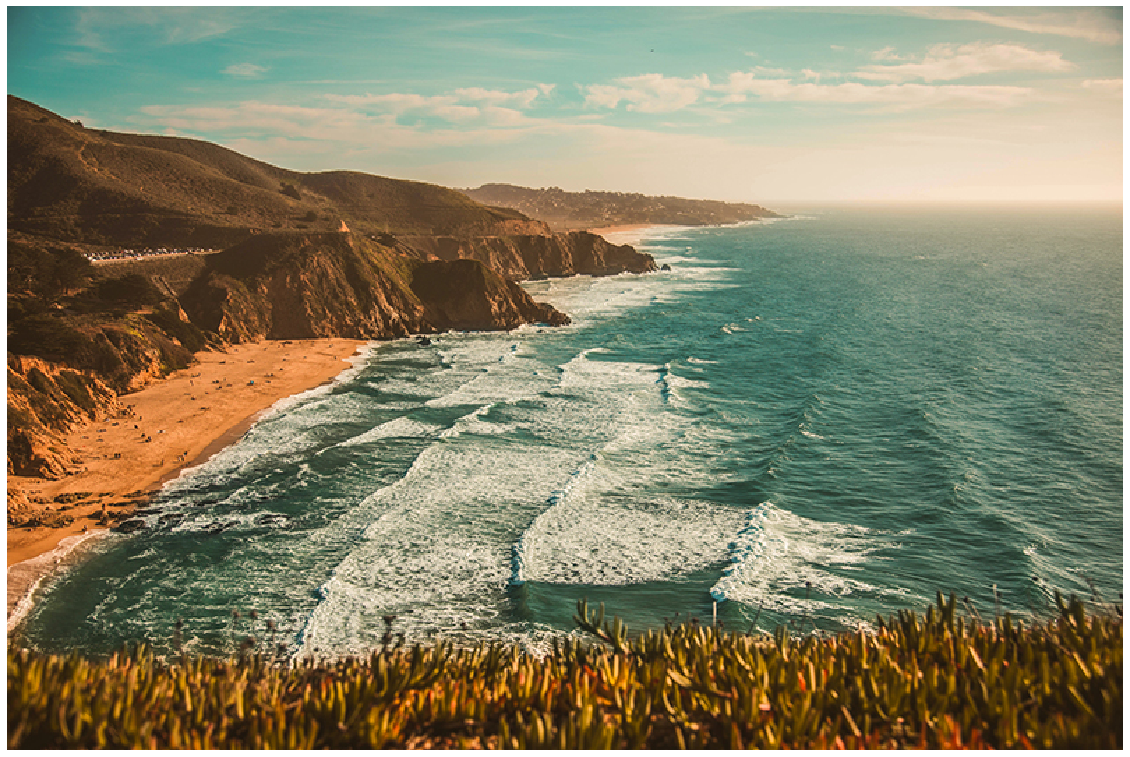

In [12]:
showImg(img,20)

In [13]:
k = constraint(img)

(56153721, 54118417, 42428608)
0.9


In [14]:
imgUp = updImg(img,k)

In [15]:
img2 = shiftHist(imgUp)

118.07190666041276	113.77719512195122	89.10111163227018
118.07190666041276	113.77719512195122	89.10111163227018
(118.07190666041276, 113.77719512195122, 89.10111163227018)
4.2947115384615415	-24.676083489681048


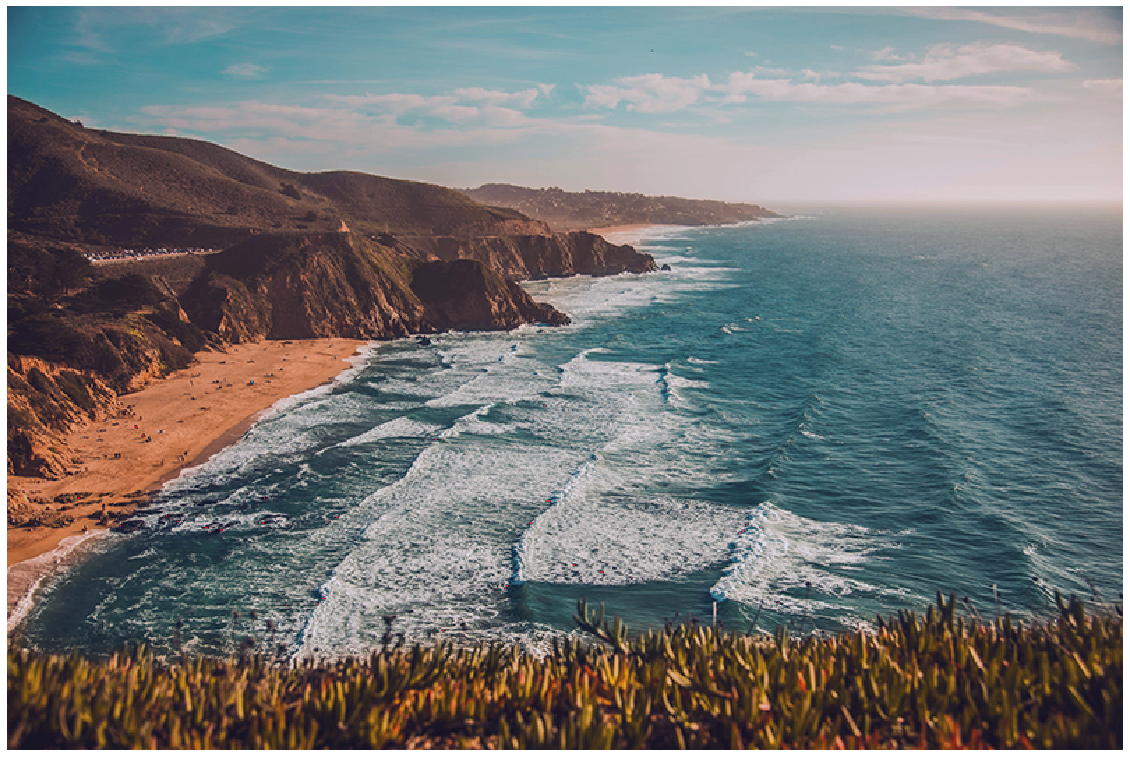

[ 38  82 105]
[43 82 81]
[48 92 91]


In [16]:
showImg(img2,20)
print(img2[0,0,:])
print(imgUp[0,0,:])
print(img[0,0,:])

In [17]:
img3 = compensation(img2)

113.09964587242027	113.77719512195122	113.10111163227018
113.09964587242027	113.77719512195122	113.10111163227018
(113.09964587242027, 113.77719512195122, 113.10111163227018)
-0.677549249530955	-0.6760834896810479
255 255.67754924953095 253 253.67608348968105


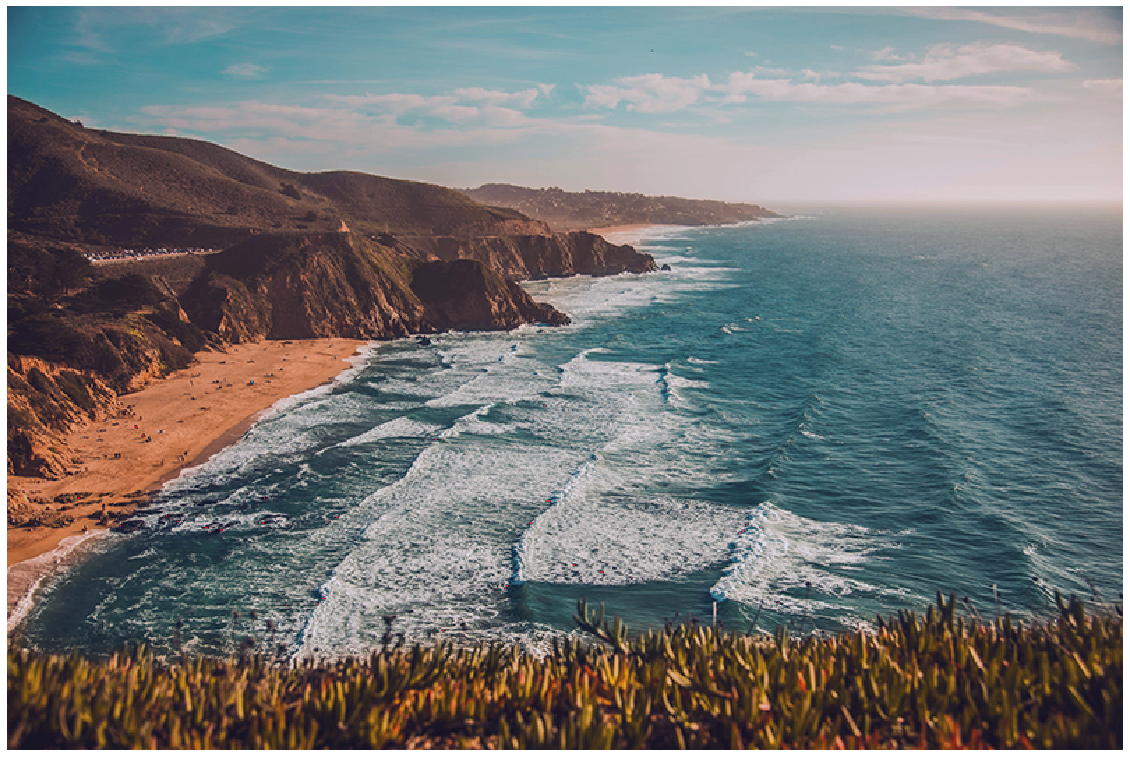

[ 38  82 105]
[ 38  82 105]
[43 82 81]
[48 92 91]


In [18]:
showImg(img3,20)
print(img3[0,0,:])
print(img2[0,0,:])
print(imgUp[0,0,:])
print(img[0,0,:])

In [19]:
saveImg(img2, 'test1')
saveImg(img3, 'test2')